In [185]:
import pandas as pd
import numpy as np
from random import *
from pandas import *
import matplotlib.pyplot as plt

%matplotlib inline

In [186]:
herp = pd.read_csv(r"C:\Users\dustin\Desktop\Wx v HERP Permutation Testing\HERP AsIs Clean Data CSV.csv", header=1)
herp.head()

,ProjectID,LocationID,Address,MobileSN,ClientFirst,ClientLast,City,Census City,AKWarmRaterName,Rater_Name,...,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234
0,40613,51686,Lt52GrandrossGrove S/DU#1,NaN,Angus,Isaac,ANCHOR POINT,Anchor Point CDP,Steven R Wisdom,Steven Wisdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40614,51687,Lt52GrandrossGrove S/DU#2,NaN,Angus,Isaac,ANCHOR POINT,Anchor Point CDP,Steven R Wisdom,Steven Wisdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144353,120612,4620 REKA DR UNIT B2,NaN,Jane,Conard,ANCHORAGE,Anchorage municipality,John Collette,John Collette,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,145334,120310,4786 MILLS DR,NaN,Lonnie,Burgener,ANCHORAGE,Anchorage municipality,Brendan Bonnett,Brendan Bonnett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147249,87642,7068 WEIMER RD UNIT 2-4,NaN,Autumn Dawn,Smith,ANCHORAGE,Anchorage municipality,Ted Veal,Ted Veal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
list(herp.columns.values)

['ProjectID',
 'LocationID',
 'Address',
 'MobileSN',
 'ClientFirst',
 'ClientLast',
 'City',
 'Census City',
 'AKWarmRaterName',
 'Rater_Name',
 'FileName',
 'RatingType',
 'RatingPoints',
 'RatingStars',
 'Rating_Date',
 'OccupancyType',
 'Occupants',
 'HouseType',
 'Bedrooms',
 'LivingUnits',
 'Actual Living Units',
 'UnitLocation',
 'Electric_Utility',
 'Gas_Utility',
 'Ceiling Height',
 'YearBuilt',
 'WinWallRatio',
 'FloorExpression',
 "FloorArea (Don't Use)",
 'GarageSize',
 "EnergyCost (Don't Use)",
 "ElectricCost (Don't Use)",
 "FuelCost (Don't Use)",
 'Birch_MMBTU',
 'Coal_MMBTU',
 'Electric_MMBTU',
 'Gas_MMBTU',
 'Oil1_MMBTU',
 'Oil2_MMBTU',
 'Propane_MMBTU',
 'Spruce_MMBTU',
 'CFM50',
 'ENACH (ACH50)',
 'ENBlowerTestOrEst',
 'VolExpression',
 'Volume',
 'DryerFuel',
 'RangeFuel',
 'OtherUse',
 'SouthWindowArea',
 'UseItemizedLightsAndAppliances',
 'VentType',
 'CITY',
 'SOURCEADDRESSLINE1',
 'CityName',
 'Updated ARIS ANCSARegionId',
 'Updated AuditorRegionId',
 'New ANCSA 

In [188]:
herp =  herp[['ProjectID','Census City','LocationID', 'RatingType', 'Address','RatingPoints', 'RatingStars','HouseType', 'YearBuilt',
              'Redone Floor Expression','New ANCSA RegionName','Total Energy','Space Heat MMBTU','DHW MMBTU',
              'Appliance/Lights MMBTU']]
herp.head()

,ProjectID,Census City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,Redone Floor Expression,New ANCSA RegionName,Total Energy,Space Heat MMBTU,DHW MMBTU,Appliance/Lights MMBTU
0,40613,Anchor Point CDP,51686,As_Is,Lt52GrandrossGrove S/DU#1,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
1,40614,Anchor Point CDP,51687,As_Is,Lt52GrandrossGrove S/DU#2,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
2,144353,Anchorage municipality,120612,As_Is,4620 REKA DR UNIT B2,58.3,2,Multi_Family_One_Unit,1978,796,Cook Inlet Regional (CIRI),110.6,65.1,29.1,16.4
3,145334,Anchorage municipality,120310,As_Is,4786 MILLS DR,59.5,2,Multi_Family_One_Unit,1981,586,Cook Inlet Regional (CIRI),139.2,95.6,24.6,19.0
4,147249,Anchorage municipality,87642,As_Is,7068 WEIMER RD UNIT 2-4,15.1,1,Multi_Family_One_Unit,1976,753,Cook Inlet Regional (CIRI),83.4,50.9,12.6,19.9


In [189]:
herp = herp.rename(columns = {
        'Space Heat MMBTU':'Space_Heat_MMBTU',
        'Redone Floor Expression':'FloorArea',
        'Census City':'City'
    })
herp.head()

,ProjectID,City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,FloorArea,New ANCSA RegionName,Total Energy,Space_Heat_MMBTU,DHW MMBTU,Appliance/Lights MMBTU
0,40613,Anchor Point CDP,51686,As_Is,Lt52GrandrossGrove S/DU#1,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
1,40614,Anchor Point CDP,51687,As_Is,Lt52GrandrossGrove S/DU#2,54.3,2,Multi_Family_One_Unit,1984,400,Cook Inlet Regional (CIRI),43.8,12.8,13.0,18.0
2,144353,Anchorage municipality,120612,As_Is,4620 REKA DR UNIT B2,58.3,2,Multi_Family_One_Unit,1978,796,Cook Inlet Regional (CIRI),110.6,65.1,29.1,16.4
3,145334,Anchorage municipality,120310,As_Is,4786 MILLS DR,59.5,2,Multi_Family_One_Unit,1981,586,Cook Inlet Regional (CIRI),139.2,95.6,24.6,19.0
4,147249,Anchorage municipality,87642,As_Is,7068 WEIMER RD UNIT 2-4,15.1,1,Multi_Family_One_Unit,1976,753,Cook Inlet Regional (CIRI),83.4,50.9,12.6,19.9


In [190]:
herp = herp.query("HouseType == 'Single_Family'")
herp = herp.query("City == 'Anchorage municipality'")
herp = herp.query("YearBuilt >= 1960")
herp = herp.query("YearBuilt < 1970")

In [191]:
herp['FloorArea'] = herp['FloorArea'].str.replace(",","")
herp['FloorArea'] = herp['FloorArea'].astype(float)
herp.dtypes

ProjectID                 float64
City                       object
LocationID                float64
RatingType                 object
Address                    object
RatingPoints              float64
RatingStars               float64
HouseType                  object
YearBuilt                 float64
FloorArea                 float64
New ANCSA RegionName       object
Total Energy               object
Space_Heat_MMBTU          float64
DHW MMBTU                 float64
Appliance/Lights MMBTU    float64
dtype: object

In [192]:
herp['kbtu_heat_per_sf'] = herp.Space_Heat_MMBTU / herp.FloorArea * 1000
herp.head()

,ProjectID,City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,FloorArea,New ANCSA RegionName,Total Energy,Space_Heat_MMBTU,DHW MMBTU,Appliance/Lights MMBTU,kbtu_heat_per_sf
308,49033,Anchorage municipality,56239,As_Is,12141 GALENA CIR,0.0,1.0,Single_Family,1969,2010,Cook Inlet Regional (CIRI),621.3,546.4,48.1,26.8,271.840796
309,48413,Anchorage municipality,14421,As_Is,4006 ALLAN PL,26.7,1.0,Single_Family,1966,3472,Cook Inlet Regional (CIRI),673.7,611.8,24.6,37.3,176.209677
386,58831,Anchorage municipality,19137,As_Is,301 E 46TH AVE,59.5,2.0,Single_Family,1969,2930,Cook Inlet Regional (CIRI),460.5,410.6,16.8,33.2,140.136519
529,15191,Anchorage municipality,1617,As_Is,7560 E 20TH AVE,60.1,2.5,Single_Family,1968,1728,Cook Inlet Regional (CIRI),296.9,230.1,41.6,25.2,133.159722
552,51019,Anchorage municipality,56530,As_Is,6885 CUTTY SARK ST,58.6,2.0,Single_Family,1966,2303,Cook Inlet Regional (CIRI),330.2,253.8,48.1,28.4,110.204082


In [193]:
wx = pd.read_csv(r"C:\Users\dustin\Desktop\Wx v HERP Permutation Testing\Wx AsIs Clean Data CSV.csv", header=0)
list(wx.columns.values)

['ProjectID',
 'LocationID',
 'Address',
 'MobileSN',
 'ClientFirst',
 'ClientLast',
 'City',
 'Census City',
 'AKWarmRaterName',
 'Rater_Name',
 'FileName',
 'RatingType',
 'RatingPoints',
 'RatingStars',
 'Rating_Date',
 'OccupancyType',
 'Occupants',
 'HouseType',
 'Bedrooms',
 'LivingUnits',
 'Actual Living Units',
 'UnitLocation',
 'Electric_Utility',
 'Gas_Utility',
 'Ceiling Height',
 'YearBuilt',
 'WinWallRatio',
 'FloorExpression',
 "FloorArea (Don't Use)",
 'GarageSize',
 'EnergyCost (Don\x92t Use)',
 " ElectricCost (Don't Use) ",
 " FuelCost (Don't Use) ",
 'Birch_MMBTU',
 'Coal_MMBTU',
 'Electric_MMBTU',
 'Gas_MMBTU',
 'Oil1_MMBTU',
 'Oil2_MMBTU',
 'Propane_MMBTU',
 'Spruce_MMBTU',
 'CFM50',
 'ENACH (ACH50)',
 'ENBlowerTestOrEst',
 'VolExpression',
 'Volume',
 'DryerFuel',
 'RangeFuel',
 'OtherUse',
 'SouthWindowArea',
 'UseItemizedLightsAndAppliances',
 'VentType',
 'CITY',
 'SOURCEADDRESSLINE1',
 'CityName',
 'Updated ARIS ANCSARegionId',
 'Updated ARIS AuditorRegionId',


In [194]:
wx =  wx[['ProjectID','Census City','LocationID', 'RatingType', 'Address','RatingPoints', 'RatingStars',
          'HouseType', 'YearBuilt','Redone Floor Expression','NEW ANCSA RegionName','Total Energy',
          'Space Heat MMBTU','DHW MMBTU','Appliance/Lights MMBTU']]

In [195]:
wx = wx.rename(columns = {
        'Space Heat MMBTU':'Space_Heat_MMBTU',
        'Redone Floor Expression':'FloorArea',
        'Census City':'City'
    })
wx = wx.query("HouseType == 'Single_Family'")
wx = wx.query("City == 'Anchorage municipality'")
wx = wx.query("YearBuilt >= 1960")
wx = wx.query("YearBuilt < 1970")
wx['FloorArea'] = wx['FloorArea'].str.replace(",","")
wx['FloorArea'] = wx['FloorArea'].astype(float)
wx['kbtu_heat_per_sf'] = wx.Space_Heat_MMBTU / wx.FloorArea * 1000
wx.head()

,ProjectID,City,LocationID,RatingType,Address,RatingPoints,RatingStars,HouseType,YearBuilt,FloorArea,NEW ANCSA RegionName,Total Energy,Space_Heat_MMBTU,DHW MMBTU,Appliance/Lights MMBTU,kbtu_heat_per_sf
1481,99901,Anchorage municipality,75914,Wx_As_Is,2434 REDWOOD ST UNIT TREET,35.1,1.0,Single_Family,1963,2122,Cook Inlet Regional (CIRI),362.7,304.6,19.4,38.7,143.543827
1506,138109,Anchorage municipality,119316,Wx_As_Is,3608 KNIK AVE,46.4,1.5,Single_Family,1962,3248,Cook Inlet Regional (CIRI),554.5,484.6,32.4,37.5,149.199507
1541,100523,Anchorage municipality,76182,Wx_As_Is,22481 MIRROR LAKE DR,31.8,1.0,Single_Family,1965,840,Cook Inlet Regional (CIRI),250.7,212.2,18.1,20.4,252.619048
1554,138424,Anchorage municipality,119447,Wx_As_Is,1415 DEMUERE PL,61.0,2.5,Single_Family,1968,1988,Cook Inlet Regional (CIRI),289.5,221.3,41.6,26.7,111.317907
1559,100100,Anchorage municipality,2124,Wx_As_Is,4432 AMES AVE,49.3,1.5,Single_Family,1969,1056,Cook Inlet Regional (CIRI),258.9,213.5,21.3,24.1,202.178030


In [196]:
wx_mean = wx['kbtu_heat_per_sf'].mean()
wx_mean

135.96404152810192

In [197]:
herp_mean = herp['kbtu_heat_per_sf'].mean()
herp_mean

131.19011817743822

In [198]:
efficiency_diff = wx_mean - herp_mean
numiterations = 10000
small_wx = wx[['RatingType', 'kbtu_heat_per_sf']]
small_herp = herp[['RatingType', 'kbtu_heat_per_sf']]
alldata = concat([small_wx, small_herp], ignore_index=True)
alldata.head()

,RatingType,kbtu_heat_per_sf
0,Wx_As_Is,143.543827
1,Wx_As_Is,149.199507
2,Wx_As_Is,252.619048
3,Wx_As_Is,111.317907
4,Wx_As_Is,202.178030


In [199]:
alldata.tail()

,RatingType,kbtu_heat_per_sf
2098,As_Is,77.820844
2099,As_Is,111.927145
2100,As_Is,97.016461
2101,As_Is,51.035451
2102,As_Is,116.181670


In [200]:
alldata.describe()

,kbtu_heat_per_sf
count,2103.000000
mean,131.362642
std,57.214578
min,38.644594
25%,93.272708
50%,118.186937
75%,153.427593
max,513.189448


In [201]:
small_wx.describe()

,kbtu_heat_per_sf
count,76.000000
mean,135.964042
std,48.471981
min,45.260417
25%,97.110117
50%,127.623310
75%,171.409329
max,254.162769


In [202]:
small_herp.describe()

,kbtu_heat_per_sf
count,2027.000000
mean,131.190118
std,57.519597
min,38.644594
25%,92.865895
50%,117.780749
75%,153.346971
max,513.189448


In [203]:
numiterations = 10000
all_groupsize = alldata['kbtu_heat_per_sf'].count()
wx_groupsize = small_wx['kbtu_heat_per_sf'].count()
herp_groupsize = small_herp['kbtu_heat_per_sf'].count()
chance_eff_difference = pd.Series(index=range(0,numiterations))
alldatashuffled = pd.DataFrame()

In [204]:
for i in range(0, numiterations):
    alldatashuffled['kbtu_heat_per_sf'] = np.random.permutation(alldata['kbtu_heat_per_sf'])
    wx_randomgroup = alldatashuffled.iloc[0:wx_groupsize]
    herp_randomgroup = alldatashuffled.iloc[wx_groupsize: all_groupsize]
    chance_eff_difference[i] = wx_randomgroup.mean() - herp_randomgroup.mean()
chance_eff_difference

0      1.975726
1     -9.322940
2      4.441165
3    -11.009218
4     -9.426738
5      3.458152
6     -3.639176
7      4.097931
8     10.233566
9      1.867599
10    -4.673779
11    -4.593080
12     2.320181
13    12.316116
14    -4.916966
...
9985    -8.392357
9986    -9.621850
9987    -6.037470
9988     3.467083
9989     2.839992
9990     4.825748
9991    12.881920
9992    -5.608343
9993    -8.975729
9994    -2.887454
9995    -8.544863
9996     5.334156
9997    -0.727835
9998     3.928448
9999     3.110788
Length: 10000, dtype: float64

In [205]:
single_side_pvalue_bool = chance_eff_difference >= efficiency_diff
single_side_pvalue = float(single_side_pvalue_bool.sum()) / float(numiterations)
single_side_pvalue

0.2321

In [206]:
two_side_pvalue_bool = chance_eff_difference <= -efficiency_diff
two_side_pvalue = (float(two_side_pvalue_bool.sum()) + float(single_side_pvalue_bool.sum())) / float(numiterations)
two_side_pvalue_percent = two_side_pvalue*100
two_side_pvalue

0.4802

In [207]:
chance_eff_difference

0      1.975726
1     -9.322940
2      4.441165
3    -11.009218
4     -9.426738
5      3.458152
6     -3.639176
7      4.097931
8     10.233566
9      1.867599
10    -4.673779
11    -4.593080
12     2.320181
13    12.316116
14    -4.916966
...
9985    -8.392357
9986    -9.621850
9987    -6.037470
9988     3.467083
9989     2.839992
9990     4.825748
9991    12.881920
9992    -5.608343
9993    -8.975729
9994    -2.887454
9995    -8.544863
9996     5.334156
9997    -0.727835
9998     3.928448
9999     3.110788
Length: 10000, dtype: float64

In [221]:
right_tail = chance_eff_difference[(chance_eff_difference >= efficiency_diff)]
right_tail = right_tail.values
#np.where(chance_eff_difference >= efficiency_diff, chance_eff_difference, 0)
#right_tail = right_tail[np.nonzero(right_tail)]
#left_tail = np.where(chance_eff_difference <= -efficiency_diff, chance_eff_difference, 0)
#left_tail = left_tail[np.nonzero(left_tail)]
left_tail = chance_eff_difference[(chance_eff_difference <= -efficiency_diff)]
left_tail = left_tail.values
#center = np.where(np.logical_and(chance_eff_difference <= efficiency_diff, chance_eff_difference >= -efficiency_diff))
center = chance_eff_difference[(chance_eff_difference <= efficiency_diff) & (chance_eff_difference >= -efficiency_diff)]
center = center.values


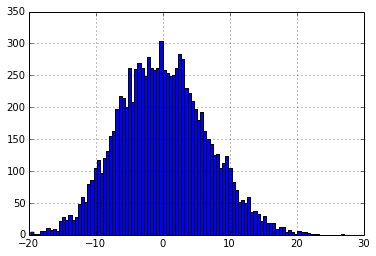

In [231]:
chance_eff_difference.hist(bins=100)
all_bars = chance_eff_difference.values

<function matplotlib.pyplot.show>

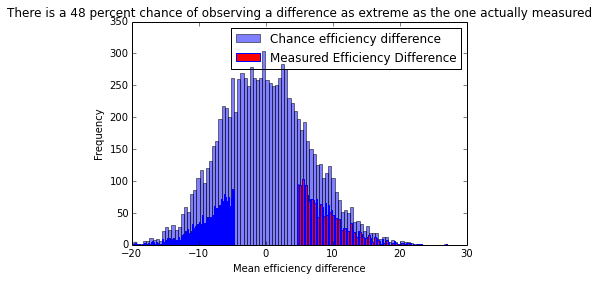

In [240]:
#plt.figure(figsize=(8, 6), dpi=100)
plt.hist(all_bars, bins=100, alpha=0.5, facecolor='b', edgecolor='black', label='Chance efficiency difference')
plt.hist(left_tail, bins=100, facecolor='r', edgecolor='b')
plt.hist(right_tail, bins=100, facecolor='r', edgecolor='b', label='Measured Efficiency Difference')
plt.legend()
plt.xlabel('Mean efficiency difference')
plt.ylabel('Frequency')
conclusion = "There is a %d percent chance of observing a difference as extreme as the one actually measured" % two_side_pvalue_percent
plt.title(conclusion)
plt.show
